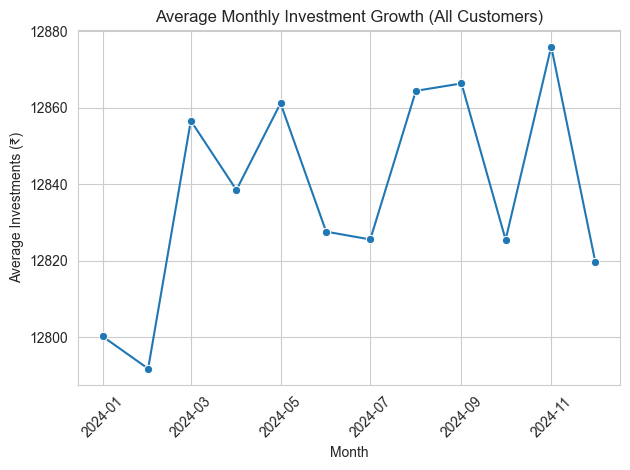

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ---------------- Load the financial behavior dataset ----------------
DOWNLOADS_DIR = os.path.join(os.path.expanduser("~"), "Downloads", "synthetic_data")
data_path = os.path.join(DOWNLOADS_DIR, "financial_behavior.csv")

df = pd.read_csv(data_path)

# Make sure month column is datetime
df['month'] = pd.to_datetime(df['month'])

# ---------------- Visualization ----------------
avg_invest = df.groupby('month')['investments'].mean().reset_index()

sns.lineplot(x='month', y='investments', data=avg_invest, marker='o')
plt.title("Average Monthly Investment Growth (All Customers)")
plt.ylabel("Average Investments (₹)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 6.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.6 MB 6.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.6 MB 6.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.6 MB 5.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 4.8 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 4.3 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.6 MB 3.6 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 3.5 MB/s eta 0:00:02
   --------------------------- ------------ 6.6/9.6 MB 3.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 3.3 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 3.3 MB/s eta 0:00:01
   ----------------

📊 Forecasting for Customer ID: 13110654
Persona: Saver
Months of data: 12


C:\Users\user\PyCharmMiscProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\PyCharmMiscProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\PyCharmMiscProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


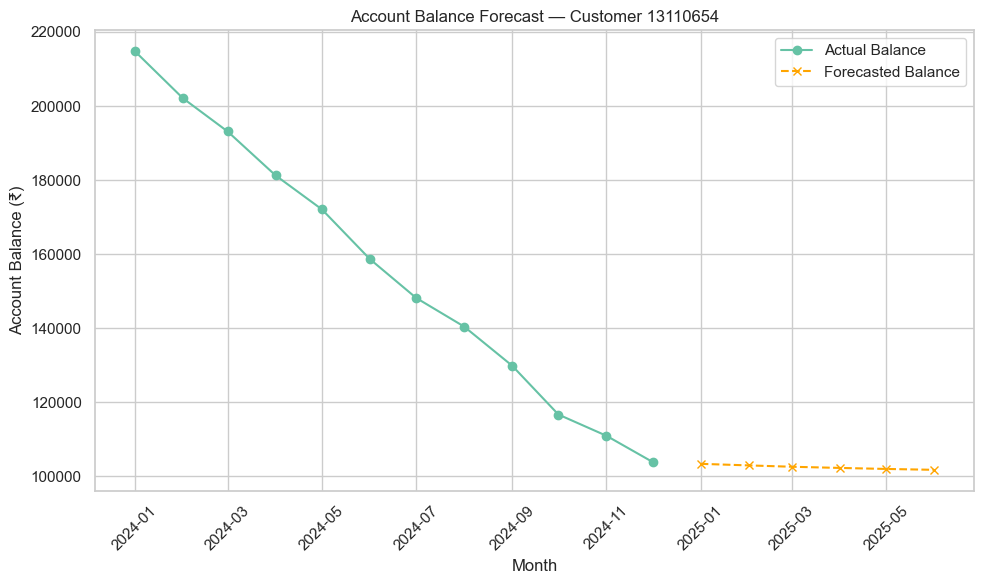

ARIMA model fitted successfully.
Forecasted Balances for next 6 months:

       month  forecasted_balance
0 2025-01-01       103416.401388
1 2025-02-01       102994.798901
2 2025-03-01       102629.375678
3 2025-04-01       102312.645735
4 2025-05-01       102038.120607
5 2025-06-01       101800.176430


In [6]:
# ------------------ Import libraries ------------------
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima.model import ARIMA

# ------------------ Load the data ------------------
DOWNLOADS_DIR = os.path.join(os.path.expanduser("~"), "Downloads", "synthetic_data")
data_path = os.path.join(DOWNLOADS_DIR, "financial_behavior.csv")

df = pd.read_csv(data_path)
df['month'] = pd.to_datetime(df['month'])

# ------------------ Select one customer ------------------
# You can choose a specific customer ID or pick one randomly
customer_id = df['customer_id'].sample(1).iloc[0]
cust = df[df['customer_id'] == customer_id].sort_values('month')

print(f"📊 Forecasting for Customer ID: {customer_id}")
print(f"Persona: {cust['persona'].iloc[0]}")
print(f"Months of data: {len(cust)}")

# ------------------ Prepare the time series ------------------
ts = cust.set_index('month')['balance']

# ------------------ Fit ARIMA model ------------------
# order=(p,d,q): AR=1, I=1 (first difference), MA=1 — common starting point
model = ARIMA(ts, order=(1, 1, 1))
results = model.fit()

# ------------------ Forecast for next 6 months ------------------
forecast_steps = 6
forecast = results.forecast(steps=forecast_steps)

# Create date range for forecast
future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=forecast_steps, freq='MS')

# Combine actual + forecast for visualization
forecast_df = pd.DataFrame({
    'month': future_dates,
    'forecasted_balance': forecast.values
})

# ------------------ Plot actual vs forecast ------------------
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts.values, label='Actual Balance', marker='o')
plt.plot(forecast_df['month'], forecast_df['forecasted_balance'], label='Forecasted Balance', linestyle='--', marker='x', color='orange')
plt.title(f"Account Balance Forecast — Customer {customer_id}")
plt.xlabel("Month")
plt.ylabel("Account Balance (₹)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------ Output summary ------------------
print("ARIMA model fitted successfully.")
print(f"Forecasted Balances for next {forecast_steps} months:\n")
print(forecast_df)